# **Regression Analysis**

Regression analysis is a set of statistical processes for estimating the relationships between a **dependent variable** (often called the 'outcome variable') and one or more **independent variables** (often called 'predictors', 'covariates', or 'features').

Regression analysis is primarily used for two conceptually distinct purposes. First, regression analysis is widely used for prediction and forecasting, Second, in some situations regression analysis can be used to infer causal relationships between the independent and dependent variables.

## **Uni-Variate Linear Regression**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_wave(n_samples=60)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
regressor = LinearRegression()
model = regressor.fit(X, y)

In [ ]:
print(f"Weight(s): {model.coef_}")
print(f"Bias: {model.intercept_}")

Weight(s): [0.42073384]
Bias: -0.059832458303618025


In [ ]:
print(f"Training set accuracy: {model.score(X_train, y_train)}")
print(f"Test set accuracy: {model.score(X_test, y_test)}")

Training set accuracy: 0.6652955562999907
Test set accuracy: 0.6809894837875873


## **Multi-variate Linear Regression**

In [ ]:
X, y = mglearn.datasets.load_extended_boston()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

regressor = LinearRegression()
model = regressor.fit(X, y)

print(f"Training set accuracy: {model.score(X_train, y_train)}")
print(f"Test set accuracy: {model.score(X_test, y_test)}")

Training set accuracy: 0.9409432213178066
Test set accuracy: 0.891708589779757


## **Regularization**

Regularization means explicitly restriciting model to avoid overfitting.

There are three popular regularization techniques, each of them aiming at decreasing the size of the coefficients: Ridge Regression, which penalizes sum of squared coefficients (L2 penalty). Lasso Regression, which penalizes the sum of absolute values of the coefficients (L1 penalty). ElasticNet Which combine the panelty of Lasso and Ridge.


As $λ → 0, β^{reg} → β^{OLS};$

As $λ → ∞, β^{reg} → 0. $

### **Ridge** (L2)

#### **alpha=1.0**

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge1 = Ridge() # default alpha=1.0
model = ridge1.fit(X_train, y_train)

print(f"Training set accuracy: {model.score(X_train, y_train)}")
print(f"Test set accuracy: {model.score(X_test, y_test)}")

Training set accuracy: 0.8857966585170941
Test set accuracy: 0.7527683481744751


#### **alpha=10**

In [ ]:
ridge10 = Ridge(alpha=10)
model = ridge10.fit(X_train, y_train)

print(f"Training set accuracy: {model.score(X_train, y_train)}")
print(f"Test set accuracy: {model.score(X_test, y_test)}")

Training set accuracy: 0.7882787115369614
Test set accuracy: 0.6359411489177309


#### **alpha=0.1**

In [ ]:
ridge01 = Ridge(alpha=0.1)
model = ridge01.fit(X_train, y_train)

print(f"Training set accuracy: {model.score(X_train, y_train)}")
print(f"Test set accuracy: {model.score(X_test, y_test)}")

Training set accuracy: 0.9282273685001992
Test set accuracy: 0.7722067936479818


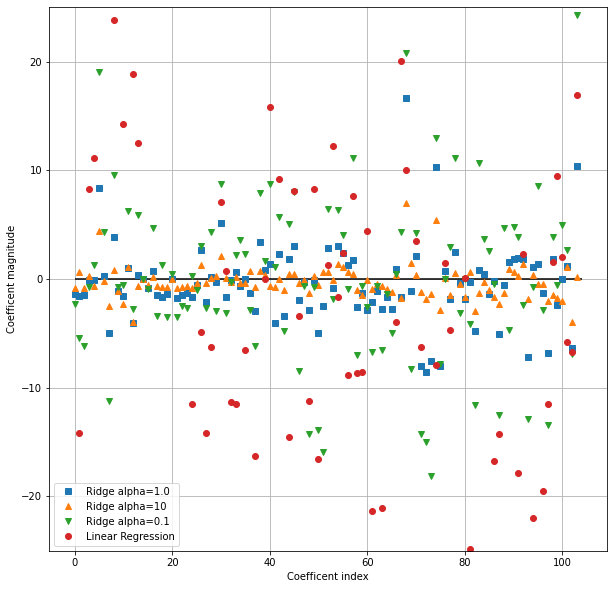

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(ridge1.coef_, 's', label='Ridge alpha=1.0')
plt.plot(ridge10.coef_, '^', label='Ridge alpha=10')
plt.plot(ridge01.coef_, 'v', label='Ridge alpha=0.1')
plt.plot(regressor.coef_, 'o', label='Linear Regression')

plt.xlabel('Coefficent index')
plt.ylabel('Coefficent magnitude')
plt.hlines(0,0, len(regressor.coef_))
plt.ylim(-25,25)
plt.legend()
plt.grid()
plt.show()

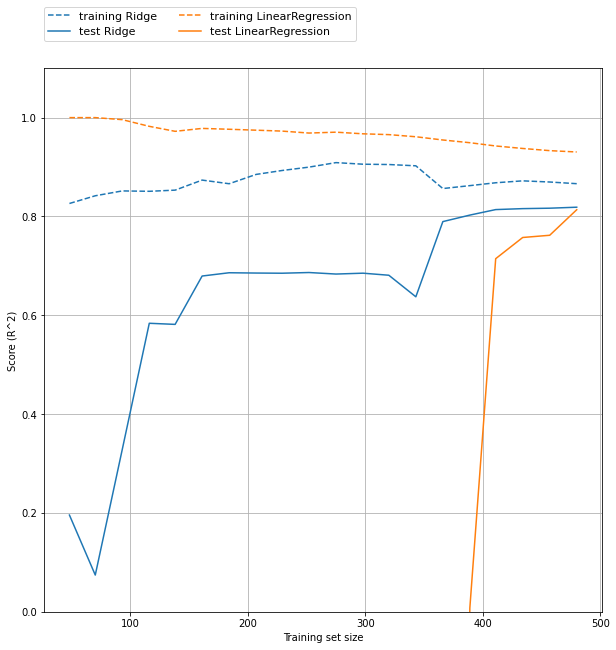

In [ ]:
plt.figure(figsize=(10,10))
mglearn.plots.plot_ridge_n_samples()
plt.grid()

### **Lasso** (L1)

Lasso is also used for Feature Selection Process.

In [ ]:
from sklearn.linear_model import Lasso

#### **alph=1.0**

In [ ]:
lasso1 = Lasso() # default alpha=1.0
model = lasso1.fit(X_train, y_train)

print(f"Training set accuracy: {model.score(X_train, y_train)}")
print(f"Test set accuracy: {model.score(X_test, y_test)}")
print(f"Number of features used: {np.sum(model.coef_ != 0)}")

Training set accuracy: 0.29323768991114607
Test set accuracy: 0.20937503255272294
Number of features used: 4


#### **alpha=0.01**

In [ ]:
lasso001 = Lasso(alpha=0.01, max_iter=10e4)
model = lasso001.fit(X_train, y_train)

print(f"Training set accuracy: {model.score(X_train, y_train)}")
print(f"Test set accuracy: {model.score(X_test, y_test)}")
print(f"Number of features used: {np.sum(model.coef_ != 0)}")

Training set accuracy: 0.8962226511086497
Test set accuracy: 0.7656571174549982
Number of features used: 33


#### **alpha=0.0001**

In [ ]:
lasso00001 = Lasso(alpha=1e-4, max_iter=10e4)
model = lasso00001.fit(X_train, y_train)

print(f"Training set accuracy: {model.score(X_train, y_train)}")
print(f"Test set accuracy: {model.score(X_test, y_test)}")
print(f"Number of features used: {np.sum(model.coef_ != 0)}")

Training set accuracy: 0.9507158754515463
Test set accuracy: 0.6437467421272821
Number of features used: 96


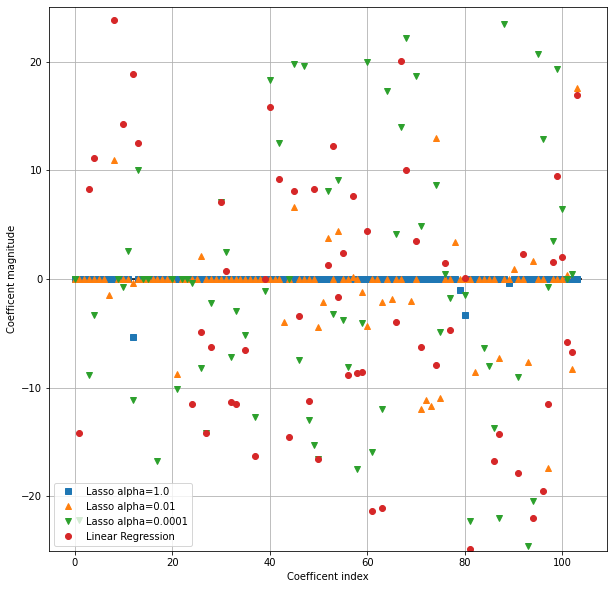

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(lasso1.coef_, 's', label='Lasso alpha=1.0')
plt.plot(lasso001.coef_, '^', label='Lasso alpha=0.01')
plt.plot(lasso00001.coef_, 'v', label='Lasso alpha=0.0001')
plt.plot(regressor.coef_, 'o', label='Linear Regression')

plt.xlabel('Coefficent index')
plt.ylabel('Coefficent magnitude')
plt.hlines(0,0, len(regressor.coef_))
plt.ylim(-25,25)
plt.legend()
plt.grid()
plt.show()